In [1]:
using RelDist
using SintPowerGraphs
using SintPowerCase
using DataFrames
using MetaGraphs
using Graphs

using Plots
using GraphRecipes

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/B5j7d/src/backends.jl:43
[ Info: Precompiling GraphRecipes [bd48cda9-67a9-57be-86fa-5b3c104eda73]


In [2]:
network_filename = joinpath(@__DIR__, "excel_test.toml")
interruption_filename = joinpath(@__DIR__, "../../databases/interruption_FASIT2.json")
cost_filename = joinpath(@__DIR__, "../../databases/cost_functions_dummy.json")

interruption = read_interruption(interruption_filename)
cost_functions = read_cost_functions(cost_filename)

Dict{String, RelDist.PieceWiseCost} with 1 entry:
  "agriculture" => PieceWiseCost(RelDist.Piece[Piece(Bound(0.0, 0.017), 0.0, 1.…

In [3]:
case = Case(network_filename)

Case(100.0, 9×13 DataFrame
 Row │ ID          type   Pd       Qd       Gs       Bs       area_num  Vm     ⋯
     │ String      Int64  Float64  Float64  Float64  Float64  Int64     Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ bus_1           1      0.0      0.0      0.0      0.0         1      1. ⋯
   2 │ bus_2           1      0.0      0.0      0.0      0.0         1      1.
   3 │ bus_3           1      0.0      0.0      0.0      0.0         1      1.
   4 │ bus_4           1      0.0      0.0      0.0      0.0         1      1.
   5 │ bus_a           1      0.0      0.0      0.0      0.0         1      1. ⋯
   6 │ bus_b           1      0.0      0.0      0.0      0.0         1      1.
   7 │ bus_c           1      0.0      0.0      0.0      0.0         1      1.
   8 │ bus_d           1      0.0      0.0      0.0      0.0         1      1.
   9 │ trans_grid      3      0.0      0.0      0.0      0.0         1      1. ⋯
             

In [4]:
network = RadialPowerGraph(case)

RadialPowerGraph({9, 8} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), Case(100.0, 9×13 DataFrame
 Row │ ID          type   Pd       Qd       Gs       Bs       area_num  Vm     ⋯
     │ String      Int64  Float64  Float64  Float64  Float64  Int64     Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ bus_1           1      0.0      0.0      0.0      0.0         1      1. ⋯
   2 │ bus_2           1      0.0      0.0      0.0      0.0         1      1.
   3 │ bus_3           1      0.0      0.0      0.0      0.0         1      1.
   4 │ bus_4           1      0.0      0.0      0.0      0.0         1      1.
   5 │ bus_a           1      0.0      0.0      0.0      0.0         1      1. ⋯
   6 │ bus_b           1      0.0      0.0      0.0      0.0         1      1.
   7 │ bus_c           1      0.0      0.0      0.0      0.0         1      1.
   8 │ bus_d           1      0.0      0.0      0.0      0.0  

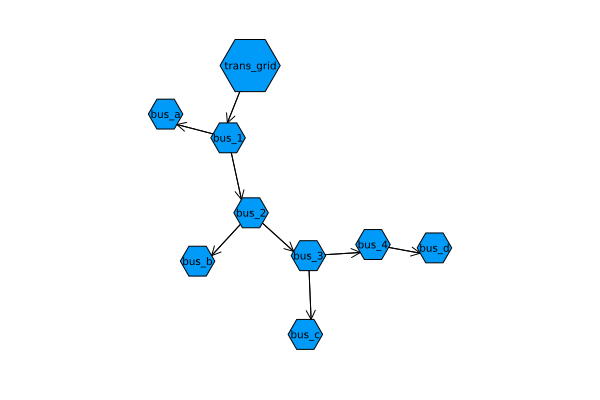

In [5]:
graphplot(network.G, curves=false, names=[props(network.G, v)[:name] for v in 1:nv(network.G)]
)

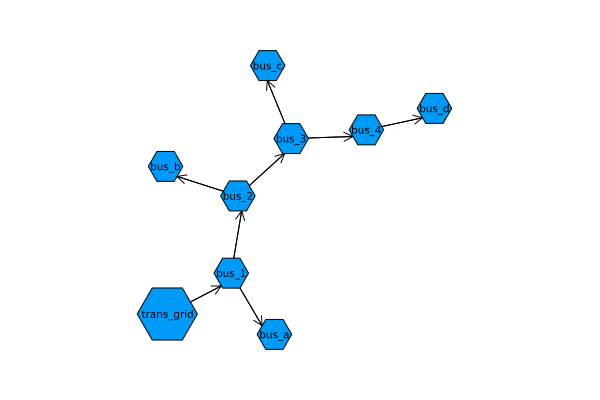

In [6]:
graphplot(network.radial, curves=false, names=[props(network.radial, v)[:name] for v in 1:nv(network.radial)]
)

In [7]:
res, rest, L, edge_pos = relrad_calc(interruption, cost_functions, network)

[ Info: Processing line RelDist.Branch{String}("trans_grid", "bus_1")
[ Info: Processing line RelDist.Branch{String}("bus_1", "bus_2")
[ Info: Processing line RelDist.Branch{String}("bus_2", "bus_3")
[ Info: Processing line RelDist.Branch{String}("bus_3", "bus_4")
[ Info: Processing line RelDist.Branch{String}("bus_4", "bus_d")
[ Info: Processing line RelDist.Branch{String}("bus_3", "bus_c")
[ Info: Processing line RelDist.Branch{String}("bus_2", "bus_b")
[ Info: Processing line RelDist.Branch{String}("bus_1", "bus_a")


(RelStruct([4.0 0.5 … 0.5 0.5; 4.0 4.0 … 0.5 0.5; 4.0 4.0 … 2.0 0.5; 4.0 4.0 … 0.5 2.0], [1.0 0.5 … 2.0 1.0; 0.8 0.4 … 1.6 0.8; 0.6000000000000001 0.30000000000000004 … 1.2000000000000002 0.6000000000000001; 0.4 0.2 … 0.8 0.4], [4.0 0.25 … 1.0 0.5; 3.2 1.6 … 0.8 0.4; 2.4000000000000004 1.2000000000000002 … 2.4000000000000004 0.30000000000000004; 1.6 0.8 … 0.4 0.8], [4.0 0.25 … 1.0 0.5; 3.2 1.6 … 0.8 0.4; 2.4000000000000004 1.2000000000000002 … 2.4000000000000004 0.30000000000000004; 1.6 0.8 … 0.4 0.8]), RelStruct([0.002 0.002 … 0.002 0.002; 0.002 0.002 … 0.002 0.002; 0.002 0.002 … 0.002 0.002; 0.002 0.002 … 0.002 0.002], [0.05 0.05 … 0.05 0.05; 0.04 0.04 … 0.04 0.04; 0.03 0.03 … 0.03 0.03; 0.02 0.02 … 0.02 0.02], [0.0001 0.0001 … 0.0001 0.0001; 8.0e-5 8.0e-5 … 8.0e-5 8.0e-5; 6.0e-5 6.0e-5 … 6.0e-5 6.0e-5; 4.0e-5 4.0e-5 … 4.0e-5 4.0e-5], [0.0001 0.0001 … 0.0001 0.0001; 8.0e-5 8.0e-5 … 8.0e-5 8.0e-5; 6.0e-5 6.0e-5 … 6.0e-5 6.0e-5; 4.0e-5 4.0e-5 … 4.0e-5 4.0e-5]), RelDist.Load[RelDist.Loa

In [8]:
rest.ENS

4×8 Matrix{Float64}:
 0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
 8.0e-5  8.0e-5  8.0e-5  8.0e-5  8.0e-5  8.0e-5  8.0e-5  8.0e-5
 6.0e-5  6.0e-5  6.0e-5  6.0e-5  6.0e-5  6.0e-5  6.0e-5  6.0e-5
 4.0e-5  4.0e-5  4.0e-5  4.0e-5  4.0e-5  4.0e-5  4.0e-5  4.0e-5

In [9]:
res.ENS'

8×4 adjoint(::Matrix{Float64}) with eltype Float64:
 4.0   3.2  2.4  1.6
 0.25  1.6  1.2  0.8
 0.75  0.6  3.6  2.4
 0.5   0.4  0.3  1.6
 2.0   0.4  0.3  0.2
 1.5   4.8  0.9  0.6
 1.0   0.8  2.4  0.4
 0.5   0.4  0.3  0.8

In [10]:
copy_g = MetaGraph(copy(network.G))

{9, 8} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [11]:
all_neighbors(network.G, 1)

3-element Vector{Int64}:
 2
 5
 9

In [12]:
network.mpc.switch

Row,f_bus,t_bus,breaker,closed
,String,String,Bool,Bool
1,trans_grid,bus_1,true,true
2,bus_1,bus_2,false,true
3,bus_2,bus_3,false,true
4,bus_3,bus_4,false,true
5,bus_1,bus_a,false,true
6,bus_2,bus_b,false,true
7,bus_3,bus_c,false,true
8,bus_4,bus_d,false,true


In [13]:
network.G[5, :name]

"bus_a"

In [14]:
network.G[9, :name]

"trans_grid"

In [15]:
newgraph = MetaDiGraph()

{0, 0} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [16]:
neighbors(network.radial, 2)

2-element Vector{Int64}:
 3
 4

In [17]:
sum(rest.ENS; dims=2)/1000

4×1 Matrix{Float64}:
 8.000000000000002e-7
 6.4e-7
 4.800000000000001e-7
 3.2e-7

In [18]:
sum(res.ENS; dims=2)

4×1 Matrix{Float64}:
 10.5
 12.200000000000001
 11.4
  8.4